In [2]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

In [3]:
load_dotenv()


True

In [4]:
llm=ChatOpenAI()

In [20]:
class JokeState(TypedDict):
    topic:str
    joke:str
    explanation:str

In [21]:
def generate_joke(state:JokeState):
    prompt=f'Generate a joke on the topic{state['topic']}.'
    response=llm.invoke(prompt).content
    return{'joke':response}
def generate_explanation(state:JokeState):
    prompt=f'Generate the detailed Explaination for the joke {state['joke']}'
    response=llm.invoke(prompt).content
    return {'explanation':response}

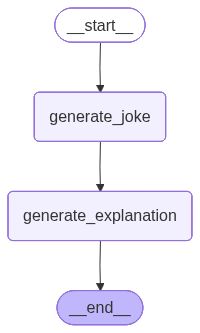

In [22]:
graph =StateGraph(JokeState)

graph.add_node('generate_joke',generate_joke)
graph.add_node('generate_explanation',generate_explanation)

graph.add_edge(START,'generate_joke')
graph.add_edge('generate_joke','generate_explanation')
graph.add_edge('generate_explanation',END)

checkpointer=InMemorySaver()

workflow=graph.compile(checkpointer=checkpointer)
workflow

In [23]:
config={'configurable':{'thread_id':'1'}}
workflow.invoke({'topic':'pizza'},config=config)

{'topic': 'pizza',
 'joke': 'Why did the cheese go to the party with the pizza? Because it wanted to be a little more "grate"ful for being invited!',
 'explanation': 'This joke is a play on words involving the cheese and pizza\'s relationship. The cheese chose to go to the party with the pizza because it wanted to show its gratitude for being invited by being a little more "grate"ful. The term "grate" in this context is a pun on the word "grateful," as cheese can be grated before being sprinkled on top of a pizza. This adds a humorous twist to the joke and highlights the cheese\'s desire to show appreciation for the invitation to the party.'}

In [24]:
workflow.get_state(config)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the cheese go to the party with the pizza? Because it wanted to be a little more "grate"ful for being invited!', 'explanation': 'This joke is a play on words involving the cheese and pizza\'s relationship. The cheese chose to go to the party with the pizza because it wanted to show its gratitude for being invited by being a little more "grate"ful. The term "grate" in this context is a pun on the word "grateful," as cheese can be grated before being sprinkled on top of a pizza. This adds a humorous twist to the joke and highlights the cheese\'s desire to show appreciation for the invitation to the party.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f113904-5220-613e-8002-a2bfabce72ab'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-02-27T03:56:18.127001+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f1139

In [25]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the cheese go to the party with the pizza? Because it wanted to be a little more "grate"ful for being invited!', 'explanation': 'This joke is a play on words involving the cheese and pizza\'s relationship. The cheese chose to go to the party with the pizza because it wanted to show its gratitude for being invited by being a little more "grate"ful. The term "grate" in this context is a pun on the word "grateful," as cheese can be grated before being sprinkled on top of a pizza. This adds a humorous twist to the joke and highlights the cheese\'s desire to show appreciation for the invitation to the party.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f113904-5220-613e-8002-a2bfabce72ab'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-02-27T03:56:18.127001+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f113

In [27]:
config1={'configurable':{'thread_id':'2'}}
workflow.invoke({"topic":'pasta'},config=config1)

{'topic': 'pasta',
 'joke': 'What do you call a fake noodle? An impasta!',
 'explanation': 'This joke is a play on words, using a pun to create humor. The term "impasta" sounds like the word "imposter," which means someone who pretends to be someone they are not. In this case, the joke is suggesting that a fake noodle is pretending to be real pasta, hence the pun "impasta." The joke is meant to be light-hearted and silly, playing on the idea of food imposters in a humorous way.'}

In [28]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pasta', 'joke': 'What do you call a fake noodle? An impasta!', 'explanation': 'This joke is a play on words, using a pun to create humor. The term "impasta" sounds like the word "imposter," which means someone who pretends to be someone they are not. In this case, the joke is suggesting that a fake noodle is pretending to be real pasta, hence the pun "impasta." The joke is meant to be light-hearted and silly, playing on the idea of food imposters in a humorous way.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f11390a-1bd4-6f5a-8002-cb70dce882fd'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-02-27T03:58:53.495233+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f11390a-082d-6bf6-8001-c2ebd9379838'}}, tasks=(), interrupts=())

In [29]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pasta', 'joke': 'What do you call a fake noodle? An impasta!', 'explanation': 'This joke is a play on words, using a pun to create humor. The term "impasta" sounds like the word "imposter," which means someone who pretends to be someone they are not. In this case, the joke is suggesting that a fake noodle is pretending to be real pasta, hence the pun "impasta." The joke is meant to be light-hearted and silly, playing on the idea of food imposters in a humorous way.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f11390a-1bd4-6f5a-8002-cb70dce882fd'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-02-27T03:58:53.495233+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f11390a-082d-6bf6-8001-c2ebd9379838'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'pasta', 'joke': 'What do you call a fake noodle? An impasta!'}, next=('

# Time Travel

In [31]:
workflow.get_state({'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f113909-fb27-6272-8000-6da6291c4f3b'}})


StateSnapshot(values={'topic': 'pasta'}, next=('generate_joke',), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f113909-fb27-6272-8000-6da6291c4f3b'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2026-02-27T03:58:50.068626+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f113909-fb23-6cae-bfff-cfef096ddcde'}}, tasks=(PregelTask(id='abdc4f4e-609e-cb3c-d30a-c832a82cb166', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': 'What do you call a fake noodle? An impasta!'}),), interrupts=())

In [33]:
workflow.invoke(None,{'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f113909-fb27-6272-8000-6da6291c4f3b'}})

{'topic': 'pasta',
 'joke': 'Why did the spaghetti go to the doctor?\n\nIt was feeling a little saucy!',
 'explanation': 'This joke plays on the pun of "saucy," which can mean both having a sassy or cheeky attitude, and also being covered in sauce. In this case, the spaghetti went to the doctor because it was feeling a little "saucy," meaning it had too much sauce on it. The joke is a play on words and a lighthearted way to make a pun about a food item going to see a doctor.'}

In [34]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the spaghetti go to the doctor?\n\nIt was feeling a little saucy!', 'explanation': 'This joke plays on the pun of "saucy," which can mean both having a sassy or cheeky attitude, and also being covered in sauce. In this case, the spaghetti went to the doctor because it was feeling a little "saucy," meaning it had too much sauce on it. The joke is a play on words and a lighthearted way to make a pun about a food item going to see a doctor.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f11394f-cb50-6313-8002-4ef69da25904'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-02-27T04:30:04.100468+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f11394f-be1a-6123-8001-1218f08cdec3'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the spaghetti go to the doctor?\n\nIt was feeling

In [37]:
workflow.update_state(
    {"configurable": {
        "thread_id": "2",
        "checkpoint_id": "1f113909-fb27-6272-8000-6da6291c4f3b",
        "checkpoint_ns": ""
    }},
    {"topic": "momo"}
)

{'configurable': {'thread_id': '2',
  'checkpoint_ns': '',
  'checkpoint_id': '1f11395b-9857-6370-8001-4b0fbc39960e'}}

In [38]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'momo'}, next=('generate_joke',), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f11395b-9857-6370-8001-4b0fbc39960e'}}, metadata={'source': 'update', 'step': 1, 'parents': {}}, created_at='2026-02-27T04:35:20.878150+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f113909-fb27-6272-8000-6da6291c4f3b'}}, tasks=(PregelTask(id='a6a794f3-5873-df72-f72f-4fe5d2462237', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the spaghetti go to the doctor?\n\nIt was feeling a little saucy!', 'explanation': 'This joke plays on the pun of "saucy," which can mean both having a sassy or cheeky attitude, and also being covered in sauce. In this case, the spaghetti went to the doctor because it was feeling a little "saucy," meaning it had too much s

In [40]:
workflow.invoke(None,{'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f11395b-9857-6370-8001-4b0fbc39960e'}})

{'topic': 'momo',
 'joke': 'Why did the momo cross the road? To get to the other side...and then disappear mysteriously into the night.',
 'explanation': 'This joke plays on the classic punchline "to get to the other side," but adds a creepy twist with the mention of the mysterious disappearance of the momo after crossing the road. Momo is a fictional character known as the "Momo Challenge," a viral urban legend about a creepy-looking woman with large eyes and a creepy smile who supposedly contacts children through social media and encourages them to perform dangerous tasks. By mentioning the disappearance of the momo into the night, the joke adds a sense of eerie and ominous humor to the punchline.'}

In [41]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'momo', 'joke': 'Why did the momo cross the road? To get to the other side...and then disappear mysteriously into the night.', 'explanation': 'This joke plays on the classic punchline "to get to the other side," but adds a creepy twist with the mention of the mysterious disappearance of the momo after crossing the road. Momo is a fictional character known as the "Momo Challenge," a viral urban legend about a creepy-looking woman with large eyes and a creepy smile who supposedly contacts children through social media and encourages them to perform dangerous tasks. By mentioning the disappearance of the momo into the night, the joke adds a sense of eerie and ominous humor to the punchline.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f11395f-a8b9-61b3-8003-c77ec16b3aa2'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2026-02-27T04:37:09.970133+00:00', parent_config={'configurable': {'t